In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [9]:
# 1 Read CSV file using Pandas
df=pd.read_csv('/content/company-sales.csv')
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


In [10]:
# 2 Removing duplicate rows from a datasets
dup=df.drop_duplicates()
print(dup)


    month_number  facecream  facewash  toothpaste  bathingsoap  shampoo  \
0              1       2500      1500        5200         9200     1200   
1              2       2630      1200        5100         6100     2100   
2              3       2140      1340        4550         9550     3550   
3              4       3400      1130        5870         8870     1870   
4              5       3600      1740        4560         7760     1560   
5              6       2760      1555        4890         7490     1890   
6              7       2980      1120        4780         8980     1780   
7              8       3700      1400        5860         9960     2860   
8              9       3540      1780        6100         8100     2100   
9             10       1990      1890        8300        10300     2300   
10            11       2340      2100        7300        13300     2400   
11            12       2900      1760        7400        14400     1800   

    moisturizer  total_u

In [7]:
#3 Checks for missing data and imputes
print("\nMissing values before:\n", df.isnull().sum())
df = df.fillna(df.mean(numeric_only=True))
print("\nMissing values after:\n", df.isnull().sum())


Missing values before:
 month_number    0
facecream       0
facewash        0
toothpaste      0
bathingsoap     0
shampoo         0
moisturizer     0
total_units     0
total_profit    0
dtype: int64

Missing values after:
 month_number    0
facecream       0
facewash        0
toothpaste      0
bathingsoap     0
shampoo         0
moisturizer     0
total_units     0
total_profit    0
dtype: int64


In [10]:
# 4 Handle data errors
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].abs()
print("Sample numeric columns after fixing errors:\n", df[num_cols].head())

Sample numeric columns after fixing errors:
    month_number  facecream  facewash  toothpaste  bathingsoap  shampoo  \
0             1       2500      1500        5200         9200     1200   
1             2       2630      1200        5100         6100     2100   
2             3       2140      1340        4550         9550     3550   
3             4       3400      1130        5870         8870     1870   
4             5       3600      1740        4560         7760     1560   

   moisturizer  total_units  total_profit  
0         1500        21100        211000  
1         1200        18330        183300  
2         1340        22470        224700  
3         1130        22270        222700  
4         1740        20960        209600  


In [35]:
# 5 Data preprocessing
# a) Binning
print("\n a) Binning")
df['Scale_bin']=pd.cut(df['total_units'],bins=3,labels=['Low','Medium','High'])
print(df[['month_number','total_profit','Scale_bin']].head())

# b) Normalization (Min-Max scaling of Profit)
print("\n b) Normalization ")
scaler = MinMaxScaler()
df['profit_norm'] = scaler.fit_transform(df[['total_profit']])
print(df[['month_number','total_profit','profit_norm']].head())

# c) Discretization
print("\n c) Discretization")
df['profit_disc'] = pd.cut(df['total_profit'], bins=4, labels=["Low", "Medium", "High", "Very High"])
print(df[['month_number','total_profit','profit_disc']].head())


 a) Binning
   month_number  total_profit Scale_bin
0             1        211000       Low
1             2        183300       Low
2             3        224700       Low
3             4        222700       Low
4             5        209600       Low

 b) Normalization 
   month_number  total_profit  profit_norm
0             1        211000     0.120697
1             2        183300     0.000000
2             3        224700     0.180392
3             4        222700     0.171678
4             5        209600     0.114597

 c) Discretization
   month_number  total_profit profit_disc
0             1        211000         Low
1             2        183300         Low
2             3        224700         Low
3             4        222700         Low
4             5        209600         Low


In [ ]:
# Standard Scaling
scaler=StandardScaler()
df['Scale_x']=scaler.fit_transform(df[['total_profit']])
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit,Scale_bin,Scale_x
0,1,2500,1500,5200,9200,1200,1500,-0.733724,211000,Low,-0.733724
1,2,2630,1200,5100,6100,2100,1200,-1.146187,183300,Low,-1.146187
2,3,2140,1340,4550,9550,3550,1340,-0.529725,224700,Low,-0.529725
3,4,3400,1130,5870,8870,1870,1130,-0.559506,222700,Low,-0.559506
4,5,3600,1740,4560,7760,1560,1740,-0.754570,209600,Low,-0.754570
5,6,2760,1555,4890,7490,1890,1555,-0.876671,201400,Low,-0.876671
6,7,2980,1120,4780,8980,1780,1120,0.524514,295500,Medium,0.524514
7,8,3700,1400,5860,9960,2860,1400,1.505790,361400,High,1.505790
8,9,3540,1780,6100,8100,2100,1780,-0.391245,234000,Low,-0.391245
9,10,1990,1890,8300,10300,2300,1890,0.095671,266700,Medium,0.095671


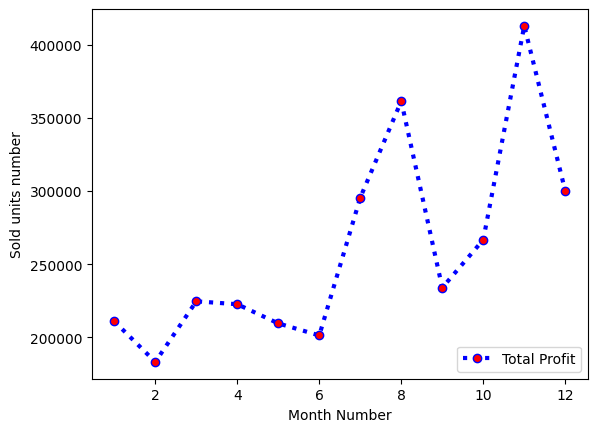

In [36]:
# 6 two columns 'month_number', 'total_profit'
x = df['month_number']
y = df['total_profit']
plt.plot(
    x, y,
    color='blue',
    linestyle='dotted',
    linewidth=3,
    marker='o',
    markerfacecolor='red',
    label='Total Profit'
)
plt.xlabel("Month Number")
plt.ylabel("Sold units number")
plt.legend(loc='lower right')
plt.show()

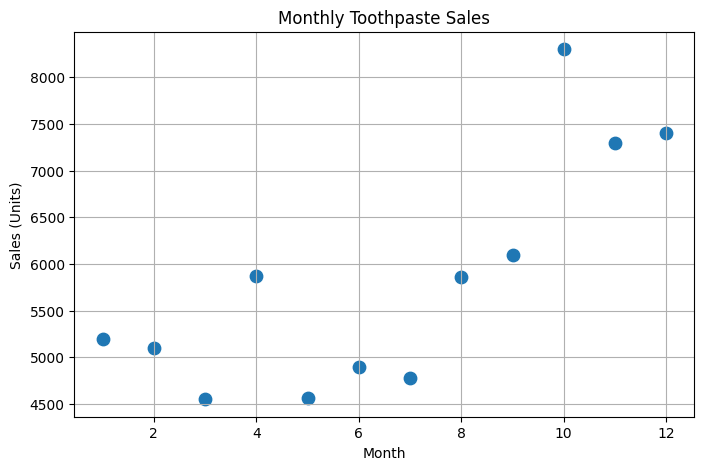

In [38]:
# 7	Read toothpaste sales data of each month and show it using a scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df['month_number'], df['toothpaste'], marker='o', s=80)
plt.title('Monthly Toothpaste Sales')
plt.xlabel('Month')
plt.ylabel('Sales (Units)')
plt.grid(True)
plt.show()

   month_number  facecream  facewash
0             1       2500      1500
1             2       2630      1200
2             3       2140      1340
3             4       3400      1130
4             5       3600      1740


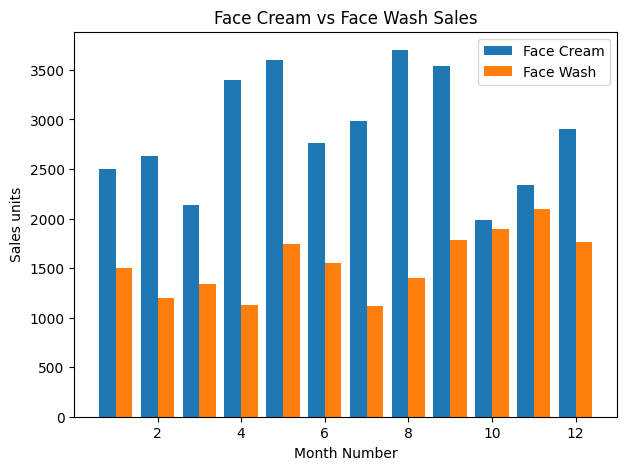

In [11]:
# 8.	Read face cream and facewash , using the bar chart
print(df[['month_number','facecream','facewash']].head())
plt.figure(figsize=(7,5))
plt.bar(df['month_number']-0.2, df['facecream'], width=0.4, label="Face Cream")
plt.bar(df['month_number']+0.2, df['facewash'], width=0.4, label="Face Wash")
plt.xlabel("Month Number")
plt.ylabel("Sales units")
plt.title("Face Cream vs Face Wash Sales")
plt.legend()
plt.show()


 Histogram of Total Profit...
Profit values (first 10):
 [211000, 183300, 224700, 222700, 209600, 201400, 295500, 361400, 234000, 266700]


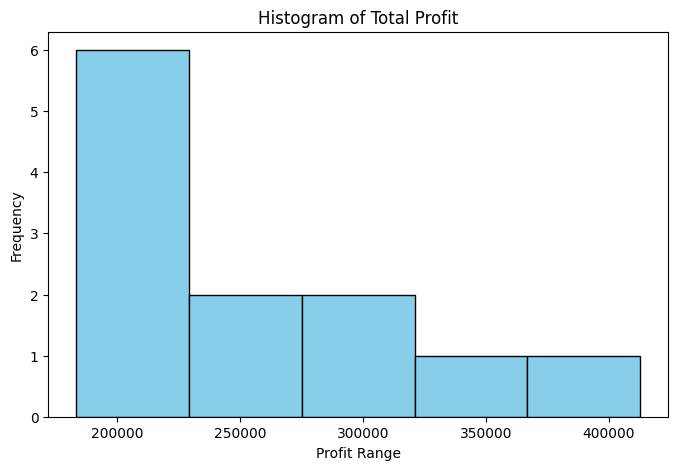

In [13]:
# 9 Histogram
print("\n Histogram of Total Profit...")
print("Profit values (first 10):\n", df['total_profit'].head(10).to_list())
plt.figure(figsize=(8,5))
plt.hist(df['total_profit'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel("Profit Range")
plt.ylabel("Frequency")
plt.title("Histogram of Total Profit")
plt.show()

Pie chart of total product sales...
Total sales per product:
 facecream       34480
facewash        18515
toothpaste      69910
bathingsoap    114010
shampoo         25410
moisturizer     18515
dtype: int64


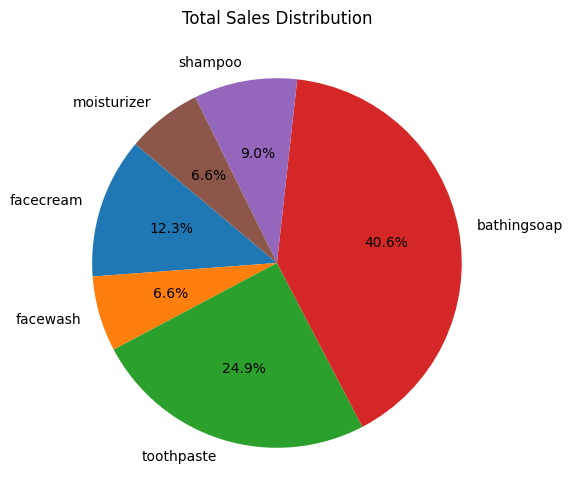

In [15]:
# 10. Pie chart
print("Pie chart of total product sales...")
products = ['facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer']
sales_sum = df[products].sum()
print("Total sales per product:\n", sales_sum)

plt.figure(figsize=(6,6))
plt.pie(sales_sum, labels=products, autopct='%1.1f%%', startangle=140)
plt.title("Total Sales Distribution")
plt.show()